## A Neural Network that performs Linear Regression

This is a quick example to demonstrate linear regression on randomly generated data using scikit learn's SGDRegressor.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_regression
import pandas as pd

## Generating Regression Data

We will generate our own dataset to gain control of the properties of the dataset.


In [4]:
data = make_regression(n_samples = 100, n_features = 3,
                       random_state=1)


The function make_regression() returns a tuple of two Numpy objects

In [5]:
print(type(data))

<class 'tuple'>


 The make_regression() function stores the features in the first numpy array, and the labels in the second NumPy array.
 
" Briefly, feature is input; label is output. This applies to both classification and regression problems.

A feature is one column of the data in your input set. For instance, if you're trying to predict the type of pet someone will choose, your input features might include age, home region, family income, etc. The label is the final choice, such as dog, fish, iguana, rock, etc.

Once you've trained your model, you will give it sets of new input containing those features; it will return the predicted "label" (pet type) for that person. " 

From: https://stackoverflow.com/questions/40898019/what-is-the-difference-between-a-feature-and-a-label/40899529

In [6]:
#Features

print(data[0])


[[ 1.29322588e+00 -6.17362064e-01 -1.10447026e-01]
 [-2.79308500e+00  3.66332015e-01  1.93752881e+00]
 [ 8.01861032e-01 -1.86569772e-01  4.65672984e-02]
 [ 1.29101580e-01  5.02740882e-01  1.61694960e+00]
 [-6.91660752e-01 -6.87172700e-01 -3.96753527e-01]
 [-7.54397941e-01  5.12929820e-01  1.25286816e+00]
 [ 1.90465871e+00  6.59049796e-01  1.11105670e+00]
 [ 2.01830179e-01  1.79215821e+00  6.61020288e-01]
 [ 4.22137467e-02 -1.10061918e+00  5.82815214e-01]
 [-1.39649634e+00 -5.04465863e-01 -1.44411381e+00]
 [-3.10116774e-01  1.03882460e+00 -2.43483776e+00]
 [ 8.36004719e-01  7.58805660e-01  1.54335911e+00]
 [-8.45080274e-02  4.17302005e-01 -2.97361883e-01]
 [-8.90555584e-01  1.95607890e+00 -1.11911540e+00]
 [-9.35769434e-01  5.30355467e-01 -2.67888080e-01]
 [ 1.55880554e+00 -1.21974440e+00  1.09402696e-01]
 [ 8.10951673e-01 -4.00878192e-01  1.04444209e+00]
 [ 4.36689932e-02  1.33145711e+00 -2.26314243e-01]
 [ 7.42044161e-01 -8.87628964e-01 -1.91835552e-01]
 [ 1.69382433e-01 -9.53700602e-

In [7]:
#First Row

data[0][0]

array([ 1.29322588, -0.61736206, -0.11044703])

In [8]:
#Labels
data[1]

array([ -10.37865986,   25.5124503 ,   19.67705609,  149.50205427,
       -121.65210879,   90.29412996,  214.01379719,  224.74157328,
        -73.17331138, -195.62776209,  -52.49101402,  201.80460524,
         20.27419601,   89.16398784,   -4.43979447,  -45.4775122 ,
         56.90170664,  120.54902155,  -66.21870151,  -43.83850762,
         34.28844887,  -77.50879778,  -26.91704015,  197.19513885,
         64.4108542 ,  -58.24364135, -100.61171138,  120.30838239,
       -324.6376023 ,   11.80311373, -178.33643388,  -12.11793859,
        -25.22113932,  162.27013301,  101.22058681,  128.5378687 ,
        -21.93291701,  141.56205532,   70.77737306,   42.75618757,
       -129.88966784,   75.63153631,    7.75853852,   27.82808415,
        -56.01743267,  -45.12995511,   -4.79734991, -224.87997574,
        -74.02423583,   32.47986763, -145.77204264,   70.44079726,
        131.09675782,  152.75477314,   -5.80729922,  126.03820644,
       -194.05903549,  -16.07374331,  -64.65855618,   89.26813

In [9]:
#First Label
data[1][0]

-10.378659861310346

Now we can use the pandas.DataFrame() constructor to make a dataframe.


In [10]:
features = pd.DataFrame(data[0])

In [11]:
labels = pd.Series(data[1])

In [12]:
features.head()

,0,1,2
0,1.293226,-0.617362,-0.110447
1,-2.793085,0.366332,1.937529
2,0.801861,-0.186570,0.046567
3,0.129102,0.502741,1.616950
4,-0.691661,-0.687173,-0.396754


In [13]:
labels.head()

0    -10.378660
1     25.512450
2     19.677056
3    149.502054
4   -121.652109
dtype: float64

Because the inputs from one layer of neurons feed into the next layer of neurons feed the next layer of the single, output neuron, this is known as a feedforward network.
In the language of graphs this is known as a directed, acyclic graph.

## Fitting a Network

Gradient Descent Method using the sci-kit learn implementation.
The implementation lives in the SGDRegressor class. 
We use it in the same way we do with the Linear Regression class.

First, we will add a bias column containing the value 1 for each row named "bias" to the features dataframe.

In [14]:
features["bias"] = 1

Now we will import SGDRegressor from the sklearn.linear_model

In [15]:
from sklearn.linear_model import SGDRegressor

Define training function which intakes features dataframe and labels series and performs model fitting.
We will use the SGDRegressor class to handle the model fitting.
The function will return a Numpy 2D array of weights for the linear regression model.

In [23]:
def train(features, labels):
    lr = SGDRegressor()
    lr.fit(features,labels)
    weights = lr.coef_
    return weights

Define a feedforward function which takes in the features dataframe and the weights NumPy array.
This will perform matrix multiplication between features (100 rows, 4 columns) and
weights (4 rows, 1 column) and assign the result to predictions.

In [24]:
def feedforward(features, weights):
    predictions = np.dot(features, weights.T)
    return predictions

Now we will run the train() and feedforward() functions. The final predictions are stored in "linear_predictions".

In [25]:
train_weights = train(features,labels)

linear_predictions = feedforward(features,train_weights)

In [26]:
linear_predictions

array([ -10.35660261,   25.46989821,   19.67455269,  149.3862387 ,
       -121.55478728,   90.22167788,  213.86510672,  224.58602803,
        -73.12041233, -195.46724381,  -52.4140114 ,  201.65544577,
         20.27304515,   89.12305275,   -4.42672333,  -45.43302379,
         56.86014798,  120.47735408,  -66.15831362,  -43.80775843,
         34.25413898,  -77.4136555 ,  -26.87429236,  197.07681195,
         64.39066246,  -58.20880833, -100.53165696,  120.22204929,
       -324.38269174,   11.79616941, -178.19930646,  -12.08835504,
        -25.1964294 ,  162.13583208,  101.18979843,  128.4509767 ,
        -21.91839053,  141.48025989,   70.72383865,   42.7403704 ,
       -129.80963817,   75.59215315,    7.75513953,   27.81845566,
        -55.97552807,  -45.06918125,   -4.7944684 , -224.72836983,
        -73.96485824,   32.45726137, -145.66220807,   70.37645015,
        130.98444665,  152.6492301 ,   -5.78458841,  125.96763626,
       -193.89842769,  -16.04010167,  -64.5857562 ,   89.20417

## Generate a dataset friendly for classification using make_classification()

Like the data generated by make_regression(), the make_classification() function returns a tuple of two NumPy objects.

The features are stored in the first NumPy array and the labels are stored in the second NumPy array.

We must first import the make_classification() function from sklearn.datasets package. 



In [27]:
from sklearn.datasets import make_classification

Generate a data set for classification:
100 observations, 4 features, random seed of 1.

In [28]:
class_data = make_classification(n_samples=100,
                                 n_features=4,
                                 random_state=1)

Features Input: Convert the NumPy array of generated features into a pandas dataframe and assign to class_features. 

In [29]:
class_features = pd.DataFrame(class_data[0])

Labels Output: Convert the NumPy array of generated labels into a pandas dataframe and assign to class_labels. 

In [30]:
class_labels = pd.DataFrame(class_data[1])

So far we have replicated linear regression as a feedforward neural network model and learned about nonlinear activation functions. We have a better idea of what defines a neural network. These are their component parts:

- A network structure (how are the nodes connected? Which direction does the data and computation flow?)
- A feedforward function (how are node weights and observation values combined?)
- An activation function (what transformations on the data are performed?)
- A model fitting function (how is the model being fitted?)


## Neural Network: Logistic Regression model

Review of Binary Classification and Logistic Regression:

In binary classification, we are interested in finding a model that can differentiate between two categorical values (9&1).
We can try to learn the probability that a given observation belongs in either category.

In the language of conditional probability, we are interested in the probability that a given observation x belongs to each category:

$ P(y=0|x)=0.3 $ <br> 
$ P(y=1|x)=0.7 $ <br>
Now, we are interested in our binary classigication model to learn:


$ P(y=|x)= ? $ <br>
If $ P(y=1|x)>0.5 $, we want the model to assign it to category (1) <br> 
If $ P(y=1|x)<0.5 $, we want the model to assign it to category (0) <br> 

Implementing a Logistic Regression Model:
<br>
A logistic regression model consists of two main components:
<br>
Computing the weighted linear combination of weights and features: $Xa^T$
<br>
Applying a transformation function to squash the result so it varies between 0 and 1: $ \sigma(Xa^T) $
<br>
Combining these two steps yields the following definition of a logistic regression model:
<br>
$\hat{y}=\sigma(Xa^T)$
<br>
In the neural networks literature, this function is represented as the sigmoid function:
$S(x)=\frac{1}{1+e^{-x}}$

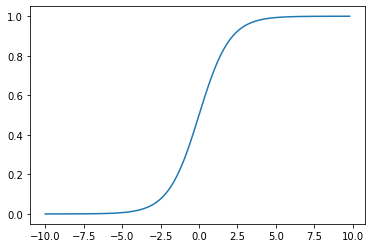

In [31]:
#Plotting a sigmoid function 
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

#Create an array for our x-values named x from (-10,10) 
#with an interval of 0.2. Pass this into the sigmoid function.

x = np.arange(-10.0,10.0,0.2)
y=sigmoid(x)

#plot the function:
plt.plot(x,y)
plt.show()

Notice that the sigmoid function has horizontal asymptotes at 0 and 1. This means that any input value will always output a value between 0 and 1.
<br>
<br>
To implement a network that performs a classification task, all we need to do is to change the activation function. We need to use a sigmoid function instead of the identity function.

In [32]:
#Add a bias containing the value 1 to each row in the class_features dataframe.
class_features["bias"] = 1

Define training function:

In [33]:
#We first need to import SGDClassifier from sklearn.linear_model

from sklearn.linear_model import SGDClassifier

In [34]:
def log_train(class_features,class_labels):
    sg = SGDClassifier()
    sg.fit(class_features,class_labels)
    return sg.coef_
    

Define sigmoid function: Takes in a NumPy 2D array and applies the sigmoid function for every value.

In [35]:
def sigmoid(linear_combination):
    log_predictions = 1/(1 + np.exp(-linear_combination))
    return log_predictions

Define log_feedforward(class_features,log_train_weights) function: <br> <br>
- Performs matrix multiplication between class_features and log_train_weights and assigns this to a linear_combination variable.
- Uses the sigmoid function to transform linear_combinations to log_predictions.
- Converts each value in log_predictions to a class label ( 0 or 1).
- Return log_predictions

In [36]:
def log_feedforward(class_features,log_train_weights):
    linear_combination = np.dot(class_features,log_train_weights.T)
    log_predictions = sigmoid(linear_combination)
    
    log_predictions[log_predictions >= 0.5] = 1
    log_predictions[log_predictions < 0.5] = 0
    
    return log_predictions

Obtain weights

In [37]:
log_train_weights = log_train(class_features,class_labels)

/Users/juancarlosreyes/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Obtain log_predictions

In [43]:
log_predictions = log_feedforward(class_features,log_train_weights)

All together:

In [42]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
#classification with 100 samples and 4 features.
class_data = make_classification(n_samples=100, n_features=4, random_state=1)
#Store features from the dataframes first index.
class_features = pd.DataFrame(class_data[0])
#Store labels fromt the dataframes second index.
class_labels = pd.Series(class_data[1])
#add bias column to the features dataframe.
class_features["bias"] = 1

#The log_train function which takes class features and labels to perform model fitting.
def log_train(class_features, class_labels):
    #SlopeGradientDescent handles model fitting
    sg = SGDClassifier()
    sg.fit(class_features, class_labels)
    #Returns a 2D NumPy array of weights for the logistic model.
    return sg.coef_

#Takes in a NumPy 2D array and applies the sigmoid function to every value.
def sigmoid(linear_combination):
    return 1/(1+np.exp(-linear_combination))
#Takes in the class features dataframe and the training weights NumPy array.
def log_feedforward(class_features, log_train_weights):
    #Performs matrix multiplication between features and weights.
    linear_combination = np.dot(class_features, log_train_weights.T)
    #Apply sigmoid function to transform the linear combinations.
    log_predictions = sigmoid(linear_combination)
    #Convert each result in log_predictions to a class label (0 or 1).
    log_predictions[log_predictions >= 0.5] = 1
    log_predictions[log_predictions < 0.5] = 0
    return log_predictions

#Run
#Create weights using the training function given class features and labels.
log_train_weights = log_train(class_features, class_labels)
#Create prediction with feedforward function given class features and weights.
log_predictions = log_feedforward(class_features, log_train_weights)

log_predictions.T

array([[0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
        1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
        0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
        0., 1., 1., 0.]])

We learned how to represent systems of equations as graphs, the different components of a neural network, and how to represent linear and logistic regression models as graphs.